# Survivalibility on Mt. Everest

## Programming for Data Analysis Project 1

## Author: David Higgins - G00411302

"Getting to the top is optional. Getting down is mandatory."

\- Ed Viesturs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

N = 200

We first import the Mt. Everest Ascent dataset to understand what information is available for mountaineers and to get an idea of the shape of that data.

In [2]:
df = pd.read_csv("Mt_Everest_Ascent_Data.csv")
df.head()

,Peak,Name,Year,Season,Date,Time,Citizenship,Sex,Age,Oxy,Dth,Host
0,EVER,Edmund Percival Hillary,1953,Spr,29-May,11:30,New Zealand,M,33,Y,.,Nepal
1,EVER,Tenzing Norgay,1953,Spr,29-May,11:30,India,M,39,Y,.,Nepal
2,EVER,Hans-Rudolf Von Gunten,1956,Spr,24-May,11:00,Switzerland,M,27,Y,.,Nepal
3,EVER,Juerg P. Marmet,1956,Spr,23-May,14:00,Switzerland,M,28,Y,.,Nepal
4,EVER,Ernst Schmied,1956,Spr,23-May,14:00,Switzerland,M,31,Y,.,Nepal


We can create a Data Series containing just the age values. It's then possible to use the describe() method to find out the mean and standard deviation of the ages of summitters.

In [3]:
ages = df.loc[:,'Age']
ages.describe()

count    10010.000000
mean        35.293906
std          9.314089
min         13.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         80.000000
Name: Age, dtype: float64

Plotting a histogram of the age Data Series gives us an idea of the shape of the distribution. This is often the best indicator of what distribution is appropriate when generating synthetic data.

(array([ 151., 1629., 2943., 2221., 1825.,  832.,  296.,   93.,   17.,
           3.]),
 array([13. , 19.7, 26.4, 33.1, 39.8, 46.5, 53.2, 59.9, 66.6, 73.3, 80. ]),
 <BarContainer object of 10 artists>)

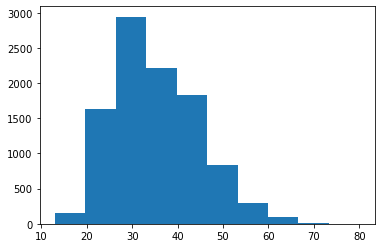

In [4]:
plt.hist(ages, bins=10)

This histogram looks relatively normally distributed. We can try generating a dataset using the mean and standard deviation of the ages Data Series.

[33.77537604 31.0778774  37.5578559  33.38606045 23.68363351 31.85281875
 17.06686377 27.17916445 38.69013585 22.59872043 25.8562478  45.01367925
 43.84121255 27.3817803  41.63297649 36.69371601 29.99952025 28.69550543
 24.06316417 21.63262885 34.18962252 42.26788495 41.45579646 37.94217035
 39.39553782 29.50256652 35.80431197 26.65996676 35.14506685 25.4210214
 27.20116317 32.07065704 51.48891083 28.61851758 45.22271154 32.50000681
 39.28745154 32.29651424 31.45332881 29.51417461 22.0900652  44.01907217
 24.65013889 33.27732167 43.74182979 45.94450196 29.26303095 36.785959
 38.47229303 43.48522689 43.07649482 34.83405738 16.2951835  30.3096249
 33.58225178 43.39097137 27.29442696 30.50279292 48.60836346 25.50735054
  6.68839607 34.30241829 28.54058601 39.50425167 44.37078536 19.72089382
 33.60104553 37.79427714 40.7570546  17.38903    38.64658945 49.61376259
 29.01012065 31.73912917 18.56660204 46.55143384 20.29817671 28.84402626
 36.79710734 47.99693262 34.20113829 21.17997036 43.513

(array([ 2.,  3., 10., 31., 45., 50., 36., 16.,  4.,  3.]),
 array([ 5.22975658, 10.95839101, 16.68702544, 22.41565987, 28.1442943 ,
        33.87292874, 39.60156317, 45.3301976 , 51.05883203, 56.78746646,
        62.51610089]),
 <BarContainer object of 10 artists>)

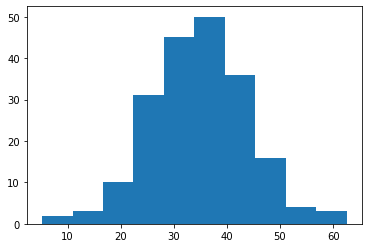

In [5]:
rng = np.random.default_rng()
vals = rng.normal(loc=ages.mean(), scale=ages.std(), size=N)
print(vals)
plt.hist(vals, bins=10)

This appears to be a pretty close approximation of the age Data Series so we will use the variable vals to synthesise age data. Next we consider the probability that a summitter climbed without oxygen. 

In [6]:
noOxygen = df.loc[df.loc[:,'Oxy'] == 'No']
noOxygen.describe()

,Year,Age
count,213.000000,213.000000
mean,2000.680751,35.394366
std,10.407792,6.350187
min,1978.000000,20.000000
25%,1993.000000,31.000000
50%,2001.000000,35.000000
75%,2010.000000,40.000000
max,2019.000000,55.000000


In [7]:
minNoOxAge = noOxygen.Age.mean() - noOxygen.Age.std()*3
maxNoOxAge = noOxygen.Age.mean() + noOxygen.Age.std()*3

print('Minimum age for no oxygen attempt is {} and maximum age is {}.'.format(round(minNoOxAge,2), round(maxNoOxAge,2)))

Minimum age for no oxygen attempt is 16.34 and maximum age is 54.44.


A recent [experiment](https://abcnews.go.com/Health/story?id=2955209&page=1) at Everest Base Camp and the [successful ascent](https://www.nytimes.com/2010/05/20/sports/20climber.html) of a 13 year old show the controversy around the ethics of minors at high altitude.

In [8]:
noOxPotential = df[(df['Age'] >= 18) & (df['Age'] <= 55)].Age.count() 
noOxPotential

9699

We can look at the historical data to get an idea of the probability that a climber will not use oxygen in their attempt. We can count the number of climbers in total who have used oxygen and divide it by the total number of summitters in the appropriate age range determined above.

In [9]:
noOxProbability = noOxygen.Age.count() / noOxPotential
noOxProbability

0.02196102690999072

In [10]:
synNoOx = rng.binomial(1, noOxProbability)
synNoOx

0

Calculate use of oxygen synthetic data

In [11]:
oxUse = []
for a in vals:
    if a >= 18 and a <= 55:
        oxUse.append(synNoOx)
    else:
        oxUse.append(1)
print(oxUse)

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]


Calculate the probabilities of climbing in each season.

In [12]:
sprCount = df.loc[df.loc[:,'Season'] == 'Spr'].Season.count()
sumCount = df.loc[df.loc[:,'Season'] == 'Sum'].Season.count()
autCount = df.loc[df.loc[:,'Season'] == 'Aut'].Season.count()
winCount = df.loc[df.loc[:,'Season'] == 'Win'].Season.count()

sprProb = sprCount / df.Season.count()
sumProb = sumCount / df.Season.count()
autProb = autCount / df.Season.count()
winProb = winCount / df.Season.count()

seasProbs = [sprProb, sumProb, autProb, winProb]
seasProbs

[0.9692307692307692,
 0.0008991008991008991,
 0.028371628371628373,
 0.0014985014985014985]

Generate a set of seasons chosen by each climber in the synthetic dataset.

In [13]:
seas = ['Spr', 'Sum', 'Aut', 'Win']
seasList = []

for i in range(0, N):
    seasChoice = random.choices(seas, weights=seasProbs)
    seasList.append(seasChoice[0])

print(seasList)

['Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Aut', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Aut', 'Aut', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Aut', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr'

Calculate the probabilities of surviving for summitting in each season with and without oxygen.

In [14]:
for i in seas:
    NoOxDeathProb = round(df[(df['Season'] == i) & (df['Oxy'] == 'No') & (df['Dth'] == 'Y')].Dth.count() \
                           / df[(df['Season'] == i) & (df['Oxy'] == 'No')].Season.count(),2)
    print('The historical probability of death after summitting when climbing without oxygen in {} is {}'.format(i,NoOxDeathProb))
    OxDeathProb = round(df[(df['Season'] == i) & (df['Oxy'] == 'Y') & (df['Dth'] == 'Y')].Dth.count() \
                           / df[(df['Season'] == i) & (df['Oxy'] == 'Y')].Season.count(),2)
    print('The historical probability of death after summitting when climbing with oxygen in {} is {}'.format(i,OxDeathProb))


The historical probability of death after summitting when climbing without oxygen in Spr is 0.06
The historical probability of death after summitting when climbing with oxygen in Spr is 0.01
The historical probability of death after summitting when climbing without oxygen in Sum is 0.0
The historical probability of death after summitting when climbing with oxygen in Sum is 0.0
The historical probability of death after summitting when climbing without oxygen in Aut is 0.13
The historical probability of death after summitting when climbing with oxygen in Aut is 0.02
The historical probability of death after summitting when climbing without oxygen in Win is 0.0
The historical probability of death after summitting when climbing with oxygen in Win is 0.07


Compile list with climber number, ages, season and oxygen use.

In [16]:
#numberOfDeaths = synEverestDataDf[synEverestDataDf['Survived'] == 'Died'].Survived.count()
#numberOfDeaths

NameError: name 'synEverestDataDf' is not defined

In [ ]:
historicalDeathRate = round(df[(df['Dth'] == 'Y')].Dth.count() / df.Dth.count(),3)
print(historicalDeathRate)

In [ ]:
#predictDeathRate = round(synEverestDataDf[(synEverestDataDf['Survived'] == 'Died')].Survived.count() / synEverestDataDf.Survived.count(),3)
#print(predictDeathRate)

In [17]:
synthEverestData = []

def everestSurFunction():
    for i in range(0, N):
        data = []

        if oxUse[i] == 1:
            oxUse2 = 'No'
        else:
            oxUse2 = 'Yes'

        data = [i, round(vals[i],0), oxUse2, seasList[i]]
        synthEverestData.append(data)
        synthEverestDataDf = pd.DataFrame(synthEverestData, columns=['Climber', 'Age', 'Oxygen', 'Season'])
        
    return synthEverestDataDf
        

everestSurFunction()


,Climber,Age,Oxygen,Season
0,0,34.0,Yes,Spr
1,1,31.0,Yes,Spr
2,2,38.0,Yes,Spr
3,3,33.0,Yes,Spr
4,4,24.0,Yes,Spr
...,...,...,...,...
195,195,28.0,Yes,Spr
196,196,42.0,Yes,Spr
197,197,25.0,Yes,Spr
198,198,24.0,Yes,Spr
